## Table of Content
- [1. Introduction to Tree based Algorithmns](#p1)
- [2. Example Data set](#p2)
- [3. Decision Tree](#p3)
    - [3.1 Creating Decision Tree classifier and fitting](#p3.1)
    - [3.2 Overfitting](#p3.2)
    - [3.3 Hyperparameter Tuning](#p3.3)
- [4. Random Forest](#p4)
    - [4.1 Creating Random Forest classifier and fitting](#p4.1)
    - [4.2 Hyperparameter Tuning](#p4.2)
- [5. XGBoost](#p5)
    - [5.1 Creating XGBoost classifier and fitting](#p5.1)
    - [5.2 Hyperparameter Tuning](#p5.2)

# Preface

In this notebook, we demonstrate classification using decision trees. We will also demonstrate model ensembling with decision trees.

### Tree Based Algorithm

- Decision Tree
- Bagging Technique (Random Forrest)
- Boosting (Gradient Boosting)


In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
#import warnings
#warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
np.random.seed(123)  # For reproducibility

# Diabetes Dataset

This dataset is originally from the *National Institute of Diabetes and Digestive and Kidney Diseases*. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, `Outcome` (1 being diabetic and 0 if not). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [3]:
df = pd.read_csv('./data/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#check missing values in train data
print("Number of missing values in each column of train data \n", df.isnull().sum())

Number of missing values in each column of train data 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Train Test Split

We are going to split the dataset as usual. This time, we are going to apply cross validation to the training set to evaluate our model for the purpose of model selection and only use the test data for final model evaluation. This is to prevent *overfitting the test set*.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Decision Tree Classification

We first fit a decision tree using `DecisionTreeClassifier` from `sklearn`.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtClf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth = 10, min_samples_leaf=5)


In [15]:
dtClf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [16]:
y_pred_dtree=dtClf.predict(x_test)

#### Feature Importance

<AxesSubplot:xlabel='importance', ylabel='Features'>

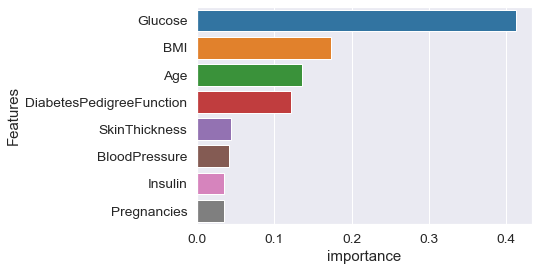

In [17]:
feat_imp={'Columns':x_train.columns.values,'Coefficients':dtClf.feature_importances_}
feat_imp=pd.DataFrame()
feat_imp['Features']=x_train.columns.values
feat_imp['importance']=dtClf.feature_importances_
feat_imp=feat_imp.sort_values(by='importance', ascending=False)
sns.barplot(y="Features", x="importance", data=feat_imp)

In [18]:
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_dtree),2))
print(classification_report(y_test, y_pred_dtree))

accuracy score 0.69
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        47
           1       0.62      0.50      0.56        30

    accuracy                           0.69        77
   macro avg       0.67      0.65      0.66        77
weighted avg       0.68      0.69      0.68        77



#### ROC-AUC curve

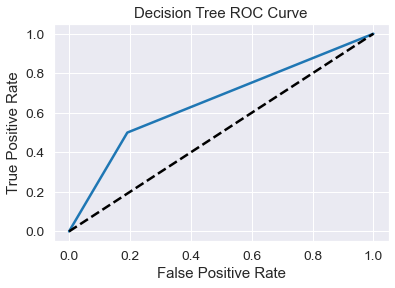

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_dtree)
auc = roc_auc_score(y_test, y_pred_dtree)

plt.plot(fpr,tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

## Cross Validation Scoring

We now use cross-validation scoring on the training set. This gives a better measure of the actual performance of our trained model.

In [20]:
from sklearn.model_selection import cross_val_score

Mean accuracy: 0.6974120082815735
Std accuracy: 0.055654796503570914


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

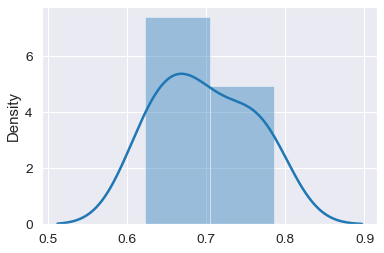

In [22]:
scores = cross_val_score(dtClf, x_train, y_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

Observe that cross validated accuracies better reflect testing performance!

In [23]:
print(f'Train accuracy: {dtClf.score(x_train, y_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {dtClf.score(x_test, y_test)}')

Train accuracy: 0.8842257597684515
Mean CV accuracy: 0.6974120082815735
Test accuracy: 0.6883116883116883


## Visualizing the Decision Tree

As mentioned in the lecture, one advantage is that the decision tree can be visualized to see how it arrives at the decision. Let us see how our tree model arrives at a diagnosis of diabetes.

We will use the `plot_tree` from `sklearn.tree` to achieve this. Alternatively, you can also use the [`graphviz` package](https://www.graphviz.org).

In [24]:
from sklearn.tree import plot_tree

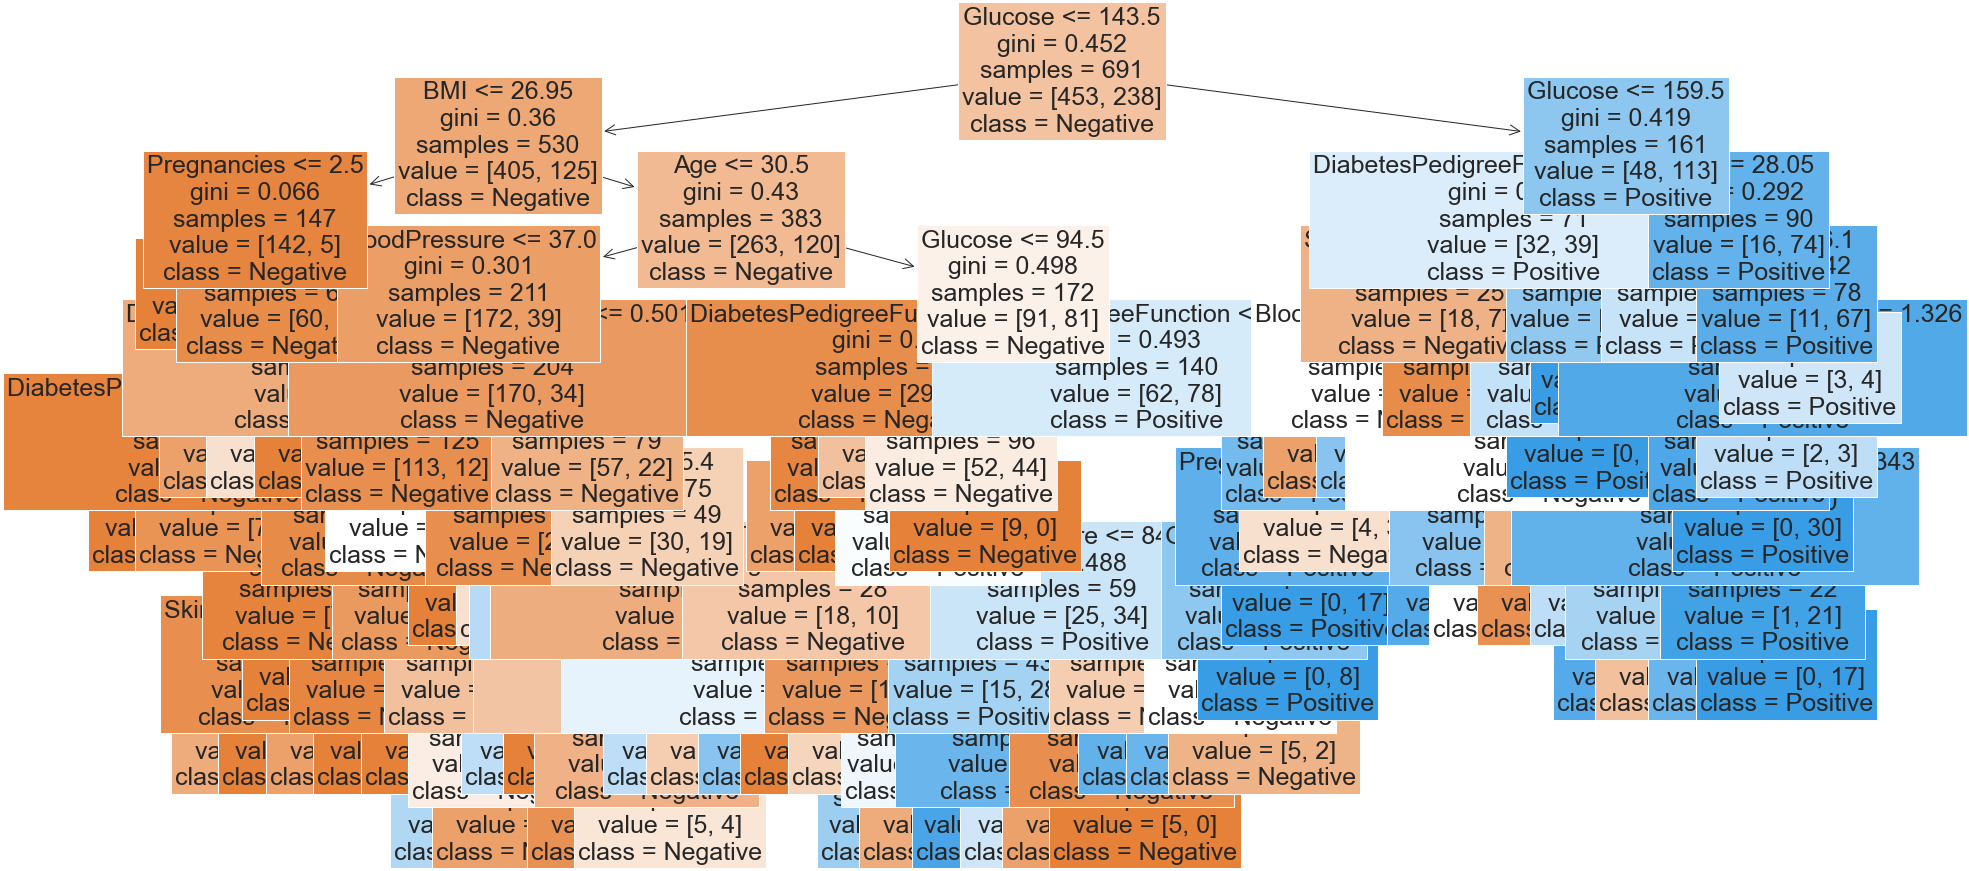

In [25]:
plt.figure(figsize=(30, 15))
plot_tree(
    dtClf,
    feature_names=df.columns[:-1],
    class_names=['Negative', 'Positive'],
    filled=True,
    fontsize=25
);

## Overfitting

Let us now fit a sequence of decision trees with increasing depth. We observe from the results below two things:
  1. As depth increases, we overfit: training accuracy increases but not test
  2. Generally, CV accuracy gives a better prediction of test error

In [26]:
results_dt = []
for depth in range(2, 8):
    dtclf = DecisionTreeClassifier(max_depth=depth)
    dtclf.fit(x_train, y_train)
    train_acc = dtclf.score(x_train, y_train)
    test_acc = dtclf.score(x_test, y_test)
    cv_acc = np.mean(cross_val_score(dtclf, x_train, y_train, cv=10))
    results_dt.append([depth, train_acc, test_acc, cv_acc])

# Create a dataframe from results with columns - 'depth', 'train accuracy', 'test accuracy', 'cv accuracy'
results_dt = pd.DataFrame(
    data=results_dt,
    columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'],
)

# Melt dataframe for easier plotting
results_dt = pd.melt(
    results_dt,
    id_vars=['depth'],
    var_name='type',
    value_name='accuracy'
)  

<AxesSubplot:xlabel='depth', ylabel='accuracy'>

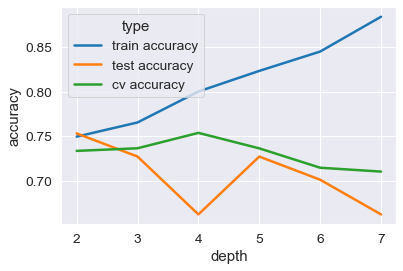

In [27]:
sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_dt,
)

#### Hyper parameter Optimization
In practice, however, to obtain good performance we should perform *hyper-parameter tuning*. This means that we should pick the parameters (e.g. `max_depth`, `criterion`, `learning_rate`, `n_estimators` , `min_sample_leaf` etc) to maximize performance. 

How do we judge performance? We use cross-validation on the training set!

We call this hyperparameter tuning as well.

In [28]:
htdtclf = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}   #this is where we are specifying the diff combos to be run


gscv_clf = GridSearchCV(htdtclf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy')


gscv_clf.fit(x_train,y_train)

print('Best Parameters using grid search: \n',
     gscv_clf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  1.88


In [29]:
# Set best parameters given by grid search
htdtclf.set_params(criterion = 'gini',max_features = None ,max_depth = 4)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [30]:
htdtclf.fit(x_train,y_train)
y_pred_cv=dtclf.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_cv),2))

accuracy score 0.66


Mean accuracy: 0.745175983436853
Std accuracy: 0.061887019068347204


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

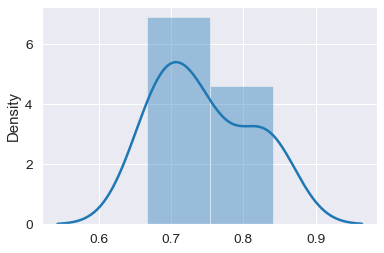

In [32]:
htscores = cross_val_score(htdtclf, x_train, y_train, cv=10)
print(f'Mean accuracy: {np.mean(htscores)}')
print(f'Std accuracy: {np.std(htscores)}')
sns.distplot(htscores)

In [33]:
print(f'Train accuracy: {htdtclf.score(x_train, y_train)}')
print(f'Mean CV accuracy: {np.mean(htscores)}')
print(f'Test accuracy: {htdtclf.score(x_test, y_test)}')

Train accuracy: 0.8002894356005789
Mean CV accuracy: 0.745175983436853
Test accuracy: 0.6623376623376623


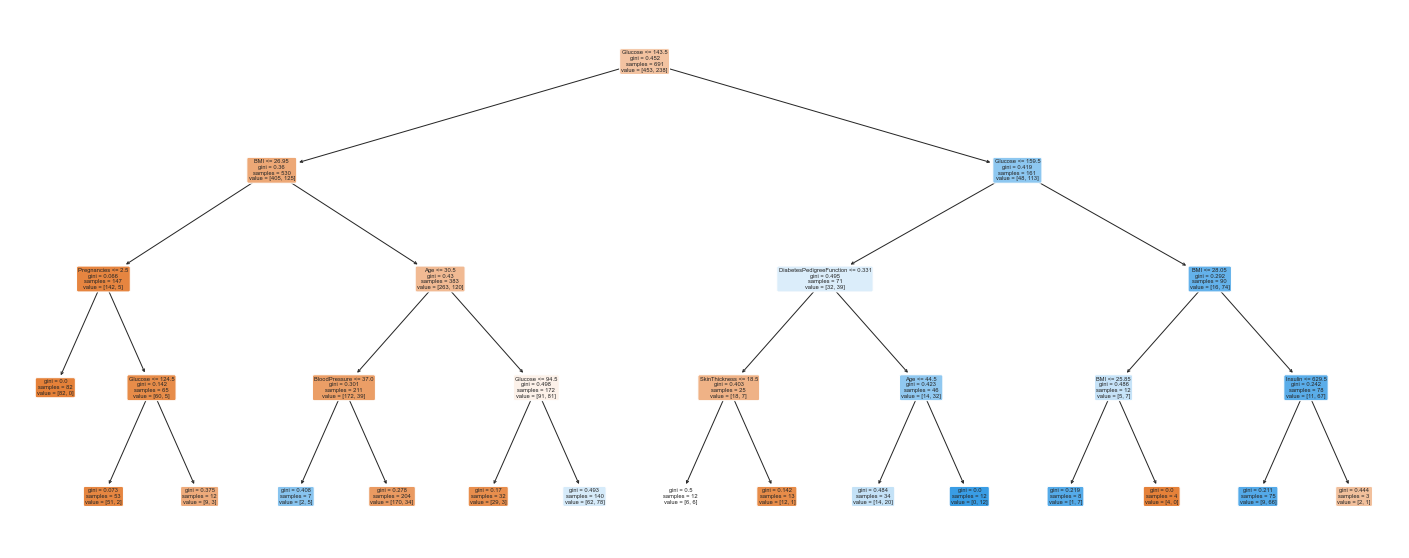

In [34]:
# Visualize the tree

 
from sklearn import tree

plt.figure(figsize = (25,10))
tree.plot_tree(htdtclf, 
                feature_names=x_train.columns,
                filled=True, rounded=True
                )

plt.show()

#### Advantages and Disadvantages

- Easy to understand and implement

- It might give us less accuracy and there are chances of overfitting

# Random Forest (Bagging)
To improve prediction technique, a group of Decision Tree classifiers, each on a different random subset of the train set, are used. Predictions of all individuals trees are used to predict the class that gets the most votes. This technique is called Random Forest. So, Random forests are also known as an ensemble method, meaning they combine predictions from other models.
Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems. Each of the smaller models in the random forest ensemble is a decision tree.

<img src="./Images/rf.jpg" width="420" height="420" align="center"/>

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfclf = RandomForestClassifier(n_estimators=100, max_depth=3)
rfclf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)

In [37]:
print(f'Train accuracy: {rfclf.score(x_train, y_train)}')
scores = cross_val_score(rfclf, x_train, y_train, cv=10)
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {rfclf.score(x_test, y_test)}')

Train accuracy: 0.7959479015918958
Mean CV accuracy: 0.7611180124223602
Test accuracy: 0.7402597402597403


In [38]:
results_rf = []
for depth in range(2, 8):
    rfclf = RandomForestClassifier(n_estimators=100, max_depth=depth)
    rfclf.fit(x_train, y_train)
    train_acc = rfclf.score(x_train, y_train)
    test_acc = rfclf.score(x_test, y_test)
    cv_acc = np.mean(cross_val_score(rfclf, x_train, y_train, cv=10))
    results_rf.append([depth, train_acc, test_acc, cv_acc])
    
# Create a dataframe of columns - 'depth', 'train accuracy', 'test accuracy', 'cv accuracy'
results_rf = pd.DataFrame(
    data=results_rf,
    columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'],
)

# Melt the values in 3 columns - 'depth','type' and accuracy
results_rf = pd.melt(
    results_rf,
    id_vars=['depth'],
    var_name='type',
    value_name='accuracy'
)

#### Comparison between DescisionTree and RandomForest

Text(0.5, 1.0, 'Random Forest')

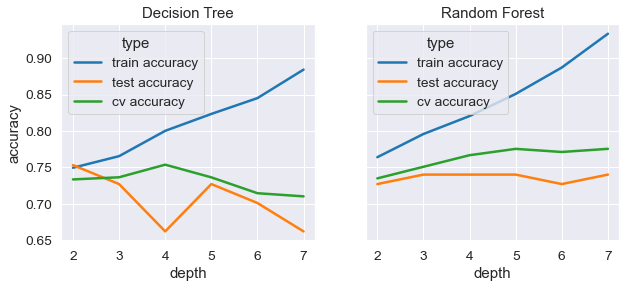

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_dt,
    ax=ax[0]
)
ax[0].set_title('Decision Tree')

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_rf,
    ax=ax[1]
)
ax[1].set_title('Random Forest')

# AdaBoost (Boosting)
We call the algorithm AdaBoost because, unlike previous algorithms, it adjusts adaptively to the errors of the weak hypotheses

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
adclf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=5,
)

In [42]:
adclf.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=5)

In [43]:
print(f'Train accuracy: {adclf.score(x_train, y_train)}')
adscores = cross_val_score(adclf, x_train, y_train, cv=10)
print(f'Mean CV accuracy: {np.mean(adscores)}')
print(f'Test accuracy: {adclf.score(x_test, y_test)}')

Train accuracy: 0.7829232995658466
Mean CV accuracy: 0.7524430641821946
Test accuracy: 0.7012987012987013


## Hyper-parameter Tuning

Observe that there are many choices in the `AdaBoost` classifier. We have mostly left everything to their default values.

In [44]:
adclf

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=5)

In practice, however, to obtain good performance we should perform *hyper-parameter tuning*. This means that we should pick the parameters (e.g. `max_depth`, `criterion`, `learning_rate`, `n_estimators` etc) to maximize performance. 

How do we judge performance? We use cross-validation on the training set!

In [45]:
from sklearn.model_selection import GridSearchCV # we can also use RandomizedSearchCV

First, we check what parameters are adjustable using `adclf.get_params()`. 

**Note: make sure you understand what these parameters mean!**

In [46]:
adclf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 1,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 1.0,
 'n_estimators': 5,
 'random_state': None}

Next we set up parameter grids and apply `GridSearchCV`. This will take some time...

In [47]:
param_grid = {
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__criterion': ['gini', 'entropy'],
    'n_estimators': [5, 25, 50],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [48]:
adclf_grid = GridSearchCV(estimator=adclf, param_grid=param_grid, cv=4)

Here the ``cv`` argument is the number of folds of cross validation.

In [49]:
adclf_grid.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Param

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          n_estimators=5),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [5, 25, 50]})

In [50]:
adclf_grid.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'learning_rate': 0.1,
 'n_estimators': 50}

In [51]:
base = DecisionTreeClassifier(max_depth=2)
htadclf = AdaBoostClassifier(estimator = base)

In [52]:
# Set best parameters given by grid search
htadclf.set_params(learning_rate = 0.1, n_estimators = 50)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1)

In [53]:
htadclf.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1)

In [54]:
print(f'Train accuracy: {htadclf.score(x_train, y_train)}')
print(f'Test accuracy: {htadclf.score(x_test, y_test)}')

Train accuracy: 0.8379160636758322
Test accuracy: 0.7402597402597403


In [55]:
print(f'Train accuracy: {htadclf.score(x_train, y_train)}')
htadclf_scores = cross_val_score(htadclf, x_train, y_train, cv=10)
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {htadclf.score(x_test, y_test)}')

Train accuracy: 0.8379160636758322
Mean CV accuracy: 0.7611180124223602
Test accuracy: 0.7402597402597403


In [56]:
results_htadclf = []
for depth in range(2, 8):
    base = DecisionTreeClassifier(max_depth=depth)
    htadclf = AdaBoostClassifier(estimator = base)
    # Set best parameters given by grid search
    htadclf.set_params(learning_rate = 0.1, n_estimators = 50)
    htadclf.fit(x_train, y_train)
    train_acc = htadclf.score(x_train, y_train)
    test_acc = htadclf.score(x_test, y_test)
    cv_acc = np.mean(cross_val_score(htadclf, x_train, y_train, cv=10))
    results_htadclf.append([depth, train_acc, test_acc, cv_acc])
    
results_htadclf = pd.DataFrame(
    data=results_htadclf,
    columns=['depth', 'train accuracy', 'test accuracy', 'cv accuracy'],
)

results_htadclf = pd.melt(
    results_htadclf,
    id_vars=['depth'],
    var_name='type',
    value_name='accuracy'
)


In [57]:
results_htadclf

,depth,type,accuracy
0,2,train accuracy,0.837916
1,3,train accuracy,0.914616
2,4,train accuracy,0.992764
3,5,train accuracy,1.000000
4,6,train accuracy,1.000000
5,7,train accuracy,1.000000
6,2,test accuracy,0.740260
7,3,test accuracy,0.727273
8,4,test accuracy,0.766234
9,5,test accuracy,0.779221


In [58]:
results_dt

,depth,type,accuracy
0,2,train accuracy,0.749638
1,3,train accuracy,0.765557
2,4,train accuracy,0.800289
3,5,train accuracy,0.823444
4,6,train accuracy,0.845152
5,7,train accuracy,0.884226
6,2,test accuracy,0.753247
7,3,test accuracy,0.727273
8,4,test accuracy,0.662338
9,5,test accuracy,0.727273


In [59]:
results_rf

,depth,type,accuracy
0,2,train accuracy,0.764110
1,3,train accuracy,0.795948
2,4,train accuracy,0.820550
3,5,train accuracy,0.850941
4,6,train accuracy,0.887120
5,7,train accuracy,0.933430
6,2,test accuracy,0.727273
7,3,test accuracy,0.740260
8,4,test accuracy,0.740260
9,5,test accuracy,0.740260


#### Comparison between DescisionTree, RandomForest and AdaBoost

Text(0.5, 1.0, 'AdaBoost')

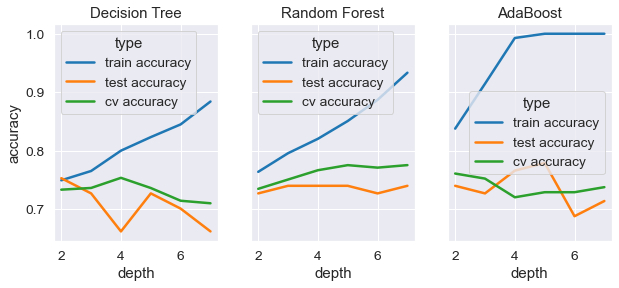

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_dt,
    ax=ax[0]
)
ax[0].set_title('Decision Tree')

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_rf,
    ax=ax[1]
)
ax[1].set_title('Random Forest')

sns.lineplot(
    x='depth',
    y='accuracy',
    hue='type',
    data=results_htadclf,
    ax=ax[2]
)
ax[2].set_title('AdaBoost')

# Final Remarks

So we have improved our results by cross-validation grid search over some hyper-parameters.

If the parameter space is very large, `sklearn.model_selection.RandomizedSearchCV`is preferrable.

Another boosting algorithm, namely gradient boosting, typically gives state of the art results on a variety of tasks. 
Check the  resources:
* [Gradient boosting on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html): another implementation, generally faster/better than sklearn's